In [1]:
from haarpy import weingarten_class
from functions import cycle_classes_St
import numpy as np
import matplotlib.pyplot as plt

**Scaling of Weingarten Coefficients**

$Wg(\sqrt{d})_{\pi}$ only depends on the conjugacy class, so let's first look at the variation across conjugacy classes that have the same length (# of cycles)

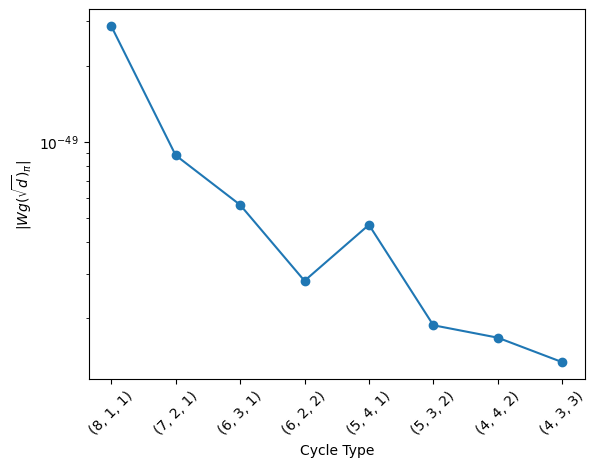

In [9]:
n = 20    # number of qubits
d = int(2**(n/2))
t = 10     # number of copies
c = 3     # number of cycles in π

conj_cl = cycle_classes_St(t, c)
wg = np.zeros(len(conj_cl))

for i in range(len(conj_cl)):
    wg[i] = weingarten_class(conj_cl[i], d)        # Weingarten coefficient for the conjugacy class
    
plt.plot(range(len(conj_cl)), np.abs(wg), 'o-')
plt.xticks(range(len(conj_cl)), [str(cl) for cl in conj_cl], rotation=45)
plt.yscale('log')
plt.xlabel('Cycle Type')
plt.ylabel(r'$|Wg(\sqrt{d})_{\pi}|$')
plt.show()

**Scaling of Weingarten Coefficients**

$Wg(\sqrt{d})_{\pi\sigma}Wg(\sqrt{d})_{\pi^{-1}\tau\sigma}$